<a href="https://colab.research.google.com/github/dg154/Task-3-Bharat_Intern/blob/main/task_3_cat%26dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats


100% 1.06G/1.06G [00:09<00:00, 89.8MB/s]
100% 1.06G/1.06G [00:09<00:00, 115MB/s] 


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D,MaxPool2D,Flatten, BatchNormalization,Dropout


In [5]:
#create batches
train_ds= keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode= 'int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

  train_ds=train_ds.map(process)
  validation_ds=validation_ds.map(process)

In [7]:
#creating CNN Model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history= model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 103ms/step - loss: 1.3923 - accuracy: 0.6040 - val_loss: 0.6062 - val_accuracy: 0.6672
Epoch 2/10
625/625 [==============================] - 62s 99ms/step - loss: 0.5638 - accuracy: 0.7132 - val_loss: 0.5384 - val_accuracy: 0.7328
Epoch 3/10
625/625 [==============================] - 63s 101ms/step - loss: 0.4959 - accuracy: 0.7592 - val_loss: 0.4664 - val_accuracy: 0.7826
Epoch 4/10
625/625 [==============================] - 63s 100ms/step - loss: 0.4423 - accuracy: 0.7898 - val_loss: 0.4918 - val_accuracy: 0.7732
Epoch 5/10
625/625 [==============================] - 63s 101ms/step - loss: 0.3977 - accuracy: 0.8151 - val_loss: 0.4547 - val_accuracy: 0.7996
Epoch 6/10
625/625 [==============================] - 63s 100ms/step - loss: 0.3329 - accuracy: 0.8505 - val_loss: 0.5028 - val_accuracy: 0.7698
Epoch 7/10
625/625 [==============================] - 63s 100ms/step - loss: 0.2797 - accuracy: 0.8749 - val_loss: 0.4761 - val_acc

<function matplotlib.pyplot.show(close=None, block=None)>

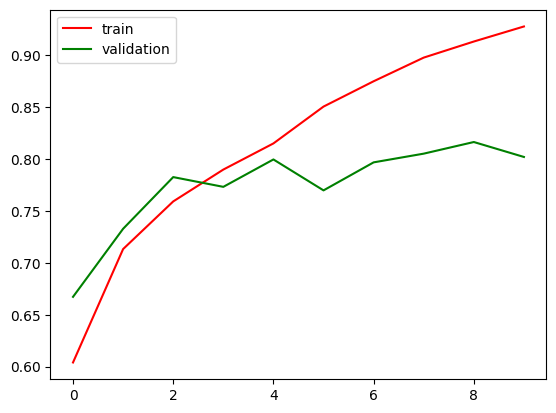

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='green',label='validation')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

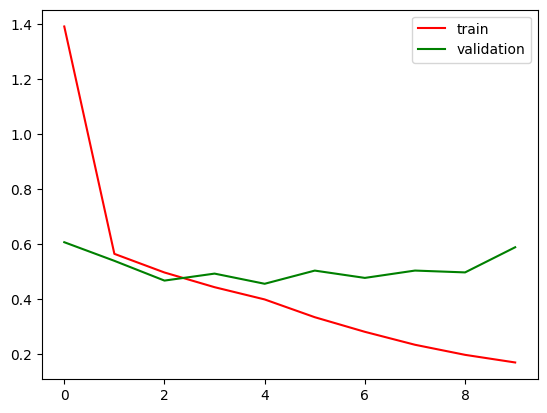

In [46]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

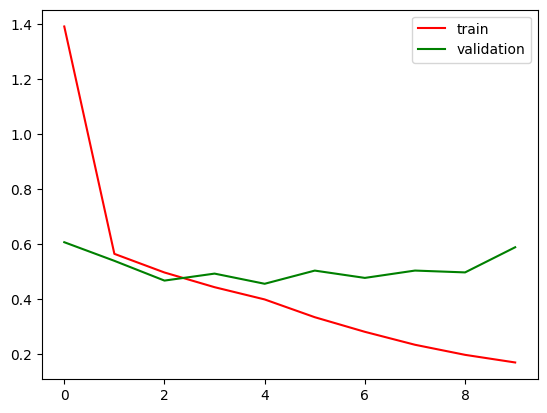

In [47]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show

In [48]:
#add more data

In [49]:
import cv2

In [50]:
import matplotlib.pyplot as plt

In [51]:
test_image=cv2.imread('/content/cat.jpeg')

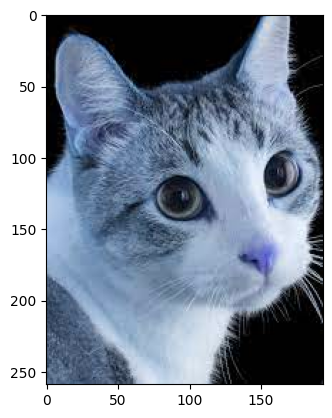

In [52]:
plt.imshow(test_image)

In [53]:
test_image.shape

(259, 194, 3)

In [54]:
test_image= cv2.resize(test_image,(256,256))

In [55]:
test_input=test_image.reshape(1,256,256,3)

In [56]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.03307647]], dtype=float32)